Today (day 9 and 10), we're doing MLE (Maximum Likelihood Estimation). Basically, trying to "predict" by computing probabilities to get estimations of OU parameters. (we'll use log to compute rly small numbers on the pc). We'll use the probability (density) of X+1 when we're at X (transition density).

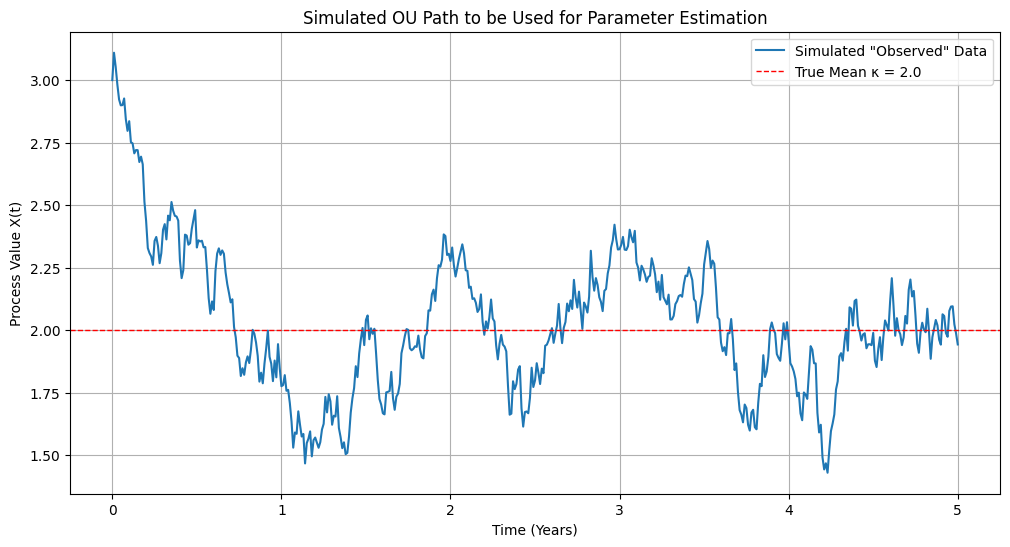

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys, os
import time

notebook_dir = os.path.dirname(os.path.abspath("__file__")) 
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

from sde_simulator.simulators import simulate_ou_em_vectorized

#imports above

#secret parameters here, we'll need to find those basically by computing the probabilities etc
THETA_TRUE = 3.0    #true speed of reversion
KAPPA_TRUE = 2.0    #true long-term mean
SIGMA_TRUE = 0.6    #true volatility
X0_TRUE = 3.0       #true initial value

#normal settings that can be found by reading graph data directly
T_DATA = 5.0        #simulate for 5 years
DT_DATA = 0.01      #use a reasonably small dt
NUM_PATHS_DATA = 1  #we only need one path

#simulate with our variables
t_data, X_data_paths = simulate_ou_em_vectorized(
    X0_TRUE, THETA_TRUE, KAPPA_TRUE, SIGMA_TRUE, 
    T_DATA, DT_DATA, NUM_PATHS_DATA
)

observed_data = X_data_paths[:, 0] 
time_points_data = t_data

plt.figure(figsize=(12, 6))
plt.plot(time_points_data, observed_data, lw=1.5, label='Simulated "Observed" Data')
plt.axhline(KAPPA_TRUE, color='red', linestyle='--', lw=1, label=f'True Mean κ = {KAPPA_TRUE}')
plt.title('Simulated OU Path to be Used for Parameter Estimation')
plt.xlabel('Time (Years)')
plt.ylabel('Process Value X(t)')
plt.legend()
plt.grid(True)
plt.show()